# **NBA Analysis**



**All data cleaning was done in SQL before importing data**


Important Questions that will be anwsered in the analysis

1. How has the average height of NBA players changed through out each decade per position?
2. How has the average weight changed of NBA players throughout the decades?
3. Which University has the most players in the NBA?
4. How has the average age of NBA players changed over the years?
5. Which position has the most points in this data set?
6. Which state has the most NBA players?
7. What were Lebron's stats like in 2012? 
8. MJ Vs Bron career stat comparison

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
players_data = pd.read_csv('players data.csv')
players = pd.read_csv('Player.csv')
season_stats = pd.read_csv('Season_Stats.csv')

In [3]:
players ## viewing all data just to be able to see what columns we have and which datasets we need in order to anwser our questions.

,int64_field_0,Player,born,birth_city,birth_state,College
0,1837,Muggsy Bogues,1965,Baltimore,Maryland,Wake Forest University
1,2587,Earl Boykins,1976,Cleveland,Ohio,Eastern Michigan University
2,1764,Spud Webb,1963,Dallas,Texas,North Carolina State University
3,1215,Monte Towe,1953,Marion,Indiana,North Carolina State University
4,1991,Greg Grant,1966,Trenton,New Jersey,Trenton State University
...,...,...,...,...,...,...
3184,1631,Ralph Sampson*,1960,Harrisonburg,Virginia,University of Virginia
3185,1563,Chuck Nevitt,1959,Cortez,Colorado,North Carolina State University
3186,3686,Sim Bhullar,1992,Ontario,Canada,New Mexico State University
3187,2248,Shawn Bradley,1972,Landstuhl,Germany,Brigham Young University


In [4]:
players_data

,name,year_start,year_end,position,height,weight,birth_date,college
0,Mack Calvin,1970,1981,G,6'0,165,27-Jul-47,University of Southern California
1,Billy Evans,1970,1970,G,6'0,170,3-Mar-47,Boston College
2,Calvin Fowler,1970,1970,G,6'0,175,11-Feb-40,Saint Francis University
3,Samuel Little,1970,1970,G,6'0,180,29-Mar-46,Delta State University
4,Gene Littles,1970,1975,G,6'0,160,29-Jun-43,High Point University
...,...,...,...,...,...,...,...,...
2893,David Wear,2015,2015,F,6'10,230,21-Sep-90,"University of California, Los Angeles"
2894,Travis Wear,2015,2015,F,6'10,230,21-Sep-90,"University of California, Los Angeles"
2895,Nerlens Noel,2015,2018,C-F,6'11,228,10-Apr-94,University of Kentucky
2896,Dwight Powell,2015,2018,F-C,6'11,240,20-Jul-91,Stanford University


In [5]:
season_stats

,int64_field_0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FTA,FT_,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS
0,5730,1980,Tiny Archibald*,PG,31,BOS,80,80,2864,15.3,...,435,0.830,59,138,197,671,106,10,242,1131
1,5748,1980,Larry Bird*,PF,23,BOS,82,82,2955,20.5,...,360,0.836,216,636,852,370,143,53,263,1745
2,5781,1980,M.L. Carr,SF,29,BOS,82,7,1994,14.6,...,241,0.739,106,224,330,156,120,36,143,914
3,5901,1980,Jeff Judkins,SF,23,BOS,65,0,674,14.1,...,76,0.816,32,34,66,47,29,5,49,351
4,5835,1980,Chris Ford,SG,31,BOS,73,73,2115,13.0,...,114,0.754,77,104,181,215,111,27,105,816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18141,24240,2017,Jarell Eddie,SF,25,PHO,5,0,62,9.7,...,9,0.889,1,6,7,0,1,0,1,24
18142,24491,2017,Andrew Nicholson,PF,27,WAS,28,0,231,6.3,...,12,0.583,11,23,34,7,11,6,11,70
18143,24247,2017,Tyler Ennis,PG,22,HOU,31,0,196,4.0,...,3,0.667,4,15,19,34,6,0,24,58
18144,24544,2017,Ronnie Price,PG,33,PHO,14,0,134,5.9,...,4,0.750,3,8,11,18,11,1,3,14





`How has the average height of NBA players changed through out each decade per position?`

`How has the average weight changed of NBA players throughout the decades?`

`How has the average age of NBA players changed over the years?`

In [6]:
## We need to use the 'players_data' dataset for this analysis. First we set up our variables to call on them easier.
height = sorted(players_data['height'])
year_start = players_data['year_start']
year_end = players_data['year_end']
postition = players_data['position']
age = season_stats['Age']


plt.rcParams['figure.figsize'] = [12,8]

plt.style.use('ggplot')

In [7]:
players_data['weight'].max()

360

Text(0, 0.5, 'Height (In)')

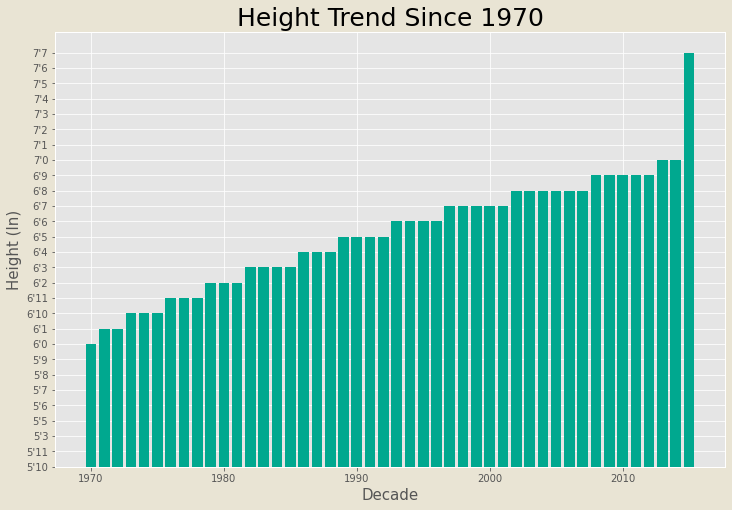

In [8]:

## First we have to set up a variable to calculate the average height for each decade

fig = plt.figure()
ax = fig.add_subplot()

fig.set_facecolor('#E9E4D4')

##ax.set_facecolor('white')

ax.set_title('Height Trend Since 1970', fontdict= {'size' : 25})

plt.bar(
    year_start,
    height, 
    color = '#00A88F')
##plt.title('Height Throughout Each Decade' ,fontdict={'size' : 20})
plt.xlabel('Decade',
           fontdict={'size' : 15})
plt.ylabel('Height (In)',
           fontdict={'size' : 15})




[]

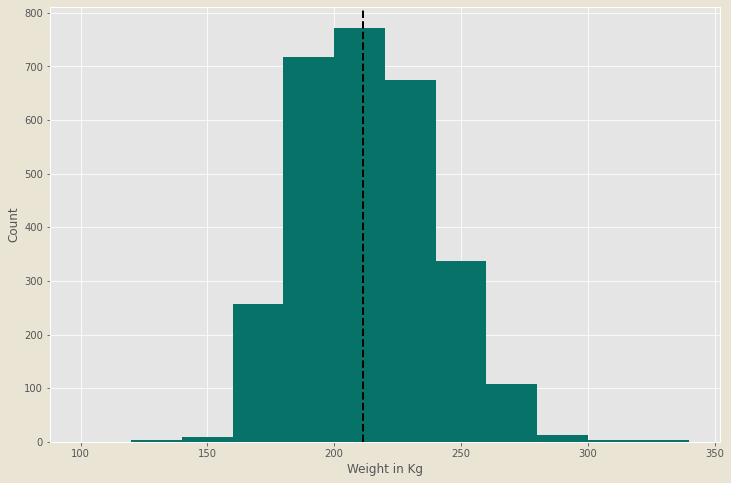

In [9]:
bins=range(100,350,20)

fig = plt.figure()
ax = fig.add_subplot()


fig.set_facecolor('#E9E4D4')

plt.hist(
    players_data["weight"],
    bins,histtype="bar",
    rwidth=1.2,
    color='#077368')
plt.xlabel('Weight in Kg')
plt.ylabel('Count')
plt.axvline(players_data["weight"].mean(), 
            color='black', 
            linestyle='dashed', 
            linewidth=2)
plt.plot()

In [10]:

## need this code to extract the indexes that contains the required years
year1 = (1970 <= players_data['year_start']) & (players_data['year_start'] <= 1979)
year2 = (1980 <= players_data['year_start']) & (players_data['year_start'] <= 1989)
year3 = (1990 <= players_data['year_start']) & (players_data['year_start'] <= 1999)
year4 = (2000 <= players_data['year_start']) & (players_data['year_start'] <= 2009)
year5 = (2010 <= players_data['year_start']) & (players_data['year_start'] <= 2015)


## This code was used to extract the desired columns 
avg70 = players_data.loc[:673 ,['year_start','weight']]
avg80 = players_data.loc[674:1304 , ['year_start','weight']]
avg90 = players_data.loc[1306:1954, [ 'year_start','weight']]
avg00 = players_data.loc[1955:2510, ['year_start','weight']]
avg10 = players_data.loc[2511:2899, ['year_start','weight']]

## Get the average of the weights for each decades
avg_w70 = avg70['weight'].sum()/673
avg_w80 = avg80['weight'].sum()/632
avg_w90 = avg90['weight'].sum()/649
avg_w00 = avg00['weight'].sum()/555
avg_w10 = avg10['weight'].sum()/388

## average = {'70': 201.33, '80': 206.99, '90': 215.12,'00' : 219.72, '10':217.27}

In [11]:
avg_w70

201.32838038632985

In [12]:
avg_w80

206.99525316455697

In [13]:
avg_w90

215.12018489984592

In [14]:
avg_w00

219.72252252252252

In [15]:
avg_w10

217.27061855670104

In [16]:
np.sum(year1)

674

In [17]:
np.sum(year2)

632

In [18]:
np.sum(year3)

649

In [19]:
np.sum(year4)

555

In [20]:
np.sum(year5)

388

Text(0.5, 1.0, 'Weight by The Decade')

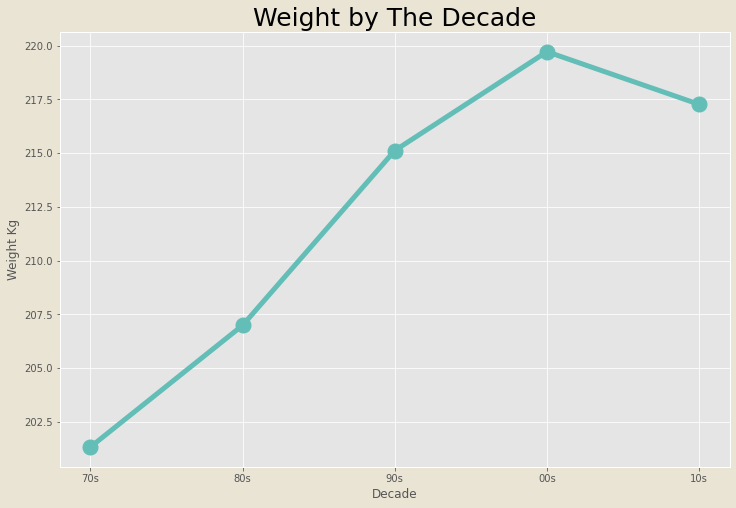

In [21]:
x = ['70s','80s','90s','00s','10s']
y = [201.33, 206.99, 215.12,219.72,217.27]

fig = plt.figure()
ax = fig.add_subplot()

fig.set_facecolor('#E9E4D4')


plt.plot(x,y, color = '#62BEB6',linewidth = 5, marker ='o',markersize = 15)
plt.xlabel('Decade')
plt.ylabel('Weight Kg')
plt.title('Weight by The Decade', fontdict={'size' : 25})

In [22]:
season_stats.drop(season_stats[season_stats['Pos'] == 'SF-SG'].index, inplace = True)

In [23]:
year_1980s = season_stats.loc[:3109 ,['Year','Age']]
year_1990s = season_stats.loc[3109:8489 ,['Year','Age']]
year_2000s = season_stats.loc[8489:13902 ,['Year','Age']]
year_2010s = season_stats.loc[13902:16977 ,['Year','Age']]


In [24]:
age_mean = year_1980s['Age'].mean()
print('The average age of an NBA player in the 80s:', age_mean)

The average age of an NBA player in the 80s: 26.340952994204766


In [25]:
age_mean90 = year_1990s['Age'].mean()
print('The average age of an NBA player in the 90s:', age_mean90)

The average age of an NBA player in the 90s: 27.23530505952381


In [26]:
age_mean00 = year_2000s['Age'].mean()
print('The average age of an NBA player in the 2000s:', age_mean00)

The average age of an NBA player in the 2000s: 27.041658952045918


In [27]:
age_mean10 = year_2000s['Age'].mean()
print('The average age of an NBA player in the 2010s:', age_mean10)

The average age of an NBA player in the 2010s: 27.041658952045918


<AxesSubplot:xlabel='Age', ylabel='count'>

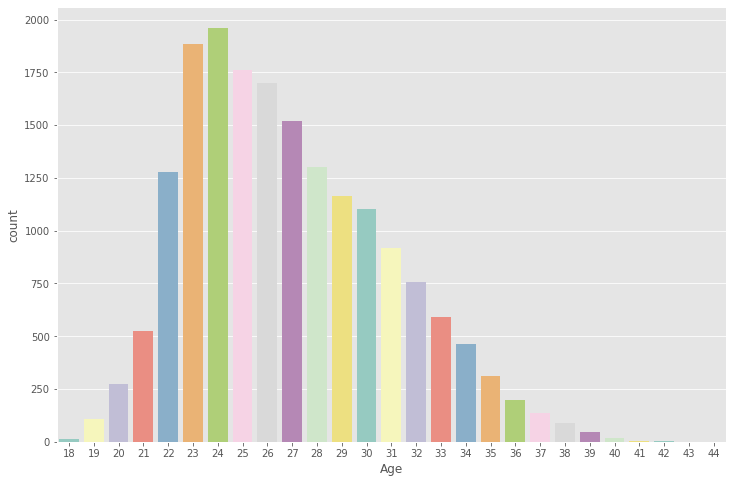

In [28]:
sns.countplot(x="Age", data = season_stats, palette='Set3')

In [29]:

season_stats.drop(season_stats [season_stats['Pos'] == 'SF-SG'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'SG-SF'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'C-PF'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'PF-C'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'SF-PF'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'PF-SF'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'PG-SG'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'SG-PG'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'SF-SG'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'C-PF'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'PG-SF'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'SG-PF'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'C-SF'].index, inplace = True)


season_stats


,int64_field_0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FTA,FT_,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS
0,5730,1980,Tiny Archibald*,PG,31,BOS,80,80,2864,15.3,...,435,0.830,59,138,197,671,106,10,242,1131
1,5748,1980,Larry Bird*,PF,23,BOS,82,82,2955,20.5,...,360,0.836,216,636,852,370,143,53,263,1745
2,5781,1980,M.L. Carr,SF,29,BOS,82,7,1994,14.6,...,241,0.739,106,224,330,156,120,36,143,914
3,5901,1980,Jeff Judkins,SF,23,BOS,65,0,674,14.1,...,76,0.816,32,34,66,47,29,5,49,351
4,5835,1980,Chris Ford,SG,31,BOS,73,73,2115,13.0,...,114,0.754,77,104,181,215,111,27,105,816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18141,24240,2017,Jarell Eddie,SF,25,PHO,5,0,62,9.7,...,9,0.889,1,6,7,0,1,0,1,24
18142,24491,2017,Andrew Nicholson,PF,27,WAS,28,0,231,6.3,...,12,0.583,11,23,34,7,11,6,11,70
18143,24247,2017,Tyler Ennis,PG,22,HOU,31,0,196,4.0,...,3,0.667,4,15,19,34,6,0,24,58
18144,24544,2017,Ronnie Price,PG,33,PHO,14,0,134,5.9,...,4,0.750,3,8,11,18,11,1,3,14


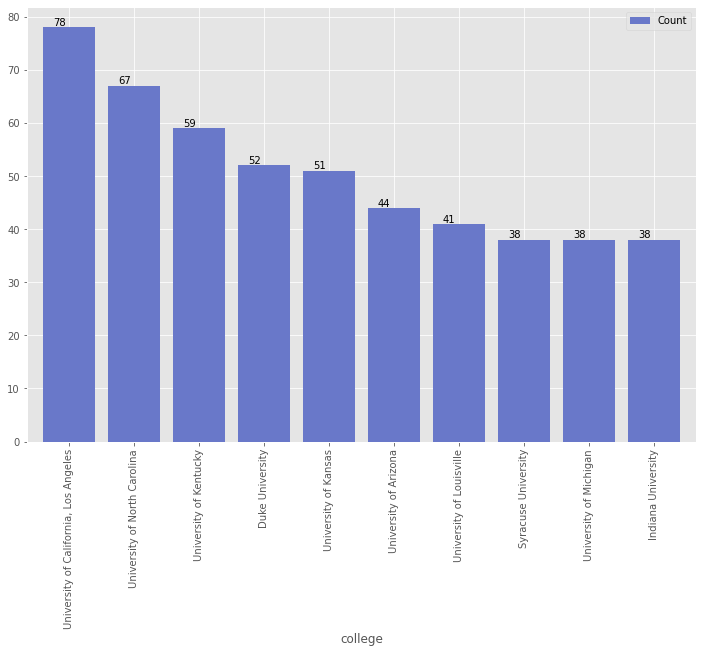

In [30]:

college=players_data.groupby(['college'])['height'].count().reset_index().sort_values(by='height',ascending=False)[:10]
college.set_index('college',inplace=True)
college.columns=['Count']
ax=college.plot.bar(width=0.8,color="#6978C9")
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.35))
plt.show()

In [31]:
## took out the extra positions because there wasnt enough data to for each of those to include in a meaningful analysis



season_stats.drop(season_stats [season_stats['Pos'] == 'SF-SG'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'SG-SF'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'C-PF'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'PF-C'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'SF-PF'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'PF-SF'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'PG-SG'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'SG-PG'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'SF-SG'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'C-PF'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'PG-SF'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'SG-PF'].index, inplace = True)
season_stats.drop(season_stats [season_stats['Pos'] == 'C-SF'].index, inplace = True)


season_stats

,int64_field_0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FTA,FT_,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS
0,5730,1980,Tiny Archibald*,PG,31,BOS,80,80,2864,15.3,...,435,0.830,59,138,197,671,106,10,242,1131
1,5748,1980,Larry Bird*,PF,23,BOS,82,82,2955,20.5,...,360,0.836,216,636,852,370,143,53,263,1745
2,5781,1980,M.L. Carr,SF,29,BOS,82,7,1994,14.6,...,241,0.739,106,224,330,156,120,36,143,914
3,5901,1980,Jeff Judkins,SF,23,BOS,65,0,674,14.1,...,76,0.816,32,34,66,47,29,5,49,351
4,5835,1980,Chris Ford,SG,31,BOS,73,73,2115,13.0,...,114,0.754,77,104,181,215,111,27,105,816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18141,24240,2017,Jarell Eddie,SF,25,PHO,5,0,62,9.7,...,9,0.889,1,6,7,0,1,0,1,24
18142,24491,2017,Andrew Nicholson,PF,27,WAS,28,0,231,6.3,...,12,0.583,11,23,34,7,11,6,11,70
18143,24247,2017,Tyler Ennis,PG,22,HOU,31,0,196,4.0,...,3,0.667,4,15,19,34,6,0,24,58
18144,24544,2017,Ronnie Price,PG,33,PHO,14,0,134,5.9,...,4,0.750,3,8,11,18,11,1,3,14


In [32]:

## extracted the three coloumns needed for the analysis

pos = season_stats.iloc[:,[1,3,-1]]

pos.groupby('Year')

pos


##year = pos['Year'].between(1980,1989, inclusive = True)



,Year,Pos,PTS
0,1980,PG,1131
1,1980,PF,1745
2,1980,SF,914
3,1980,SF,351
4,1980,SG,816
...,...,...,...
18141,2017,SF,24
18142,2017,PF,70
18143,2017,PG,58
18144,2017,PG,14


In [33]:
PG = pos.loc[pos['Pos'] == 'PG', 'PTS'].mean()
SG = pos.loc[pos['Pos'] == 'SG', 'PTS'].mean()
SF = pos.loc[pos['Pos'] == 'SF', 'PTS'].mean()
PF = pos.loc[pos['Pos'] == 'PF', 'PTS'].mean()
C = pos.loc[pos['Pos'] == 'C', 'PTS'].mean()

In [34]:
PG

473.82839745363964

In [35]:
SG

542.9234910739586

In [36]:
SF

540.0345939607154

In [37]:
PF

469.9320465362242

In [38]:
C

402.79241627456406

([<matplotlib.patches.Wedge at 0x7f144082ceb0>,
 [Text(0.940805909171586, 0.6613503166006842, 'PG'),
  Text(-0.4364522078939588, 1.1713280796704604, 'SG'),
  Text(-1.1301123342498864, -0.21294626546683773, 'SF'),
  Text(-0.09026131023189139, -1.146452308591693, 'PF'),
  Text(0.9975066904978386, -0.5722590343647265, 'C')],
 [Text(0.4908552569590884, 0.3450523390960092, '19.50%'),
  Text(-0.2444132364206169, 0.6559437246154578, '22.35%'),
  Text(-0.5896238265651581, -0.1111023993740023, '22.23%'),
  Text(-0.04709285751229116, -0.5981490305695789, '19.34%'),
  Text(0.5204382733032201, -0.2985699309729008, '16.58%')])

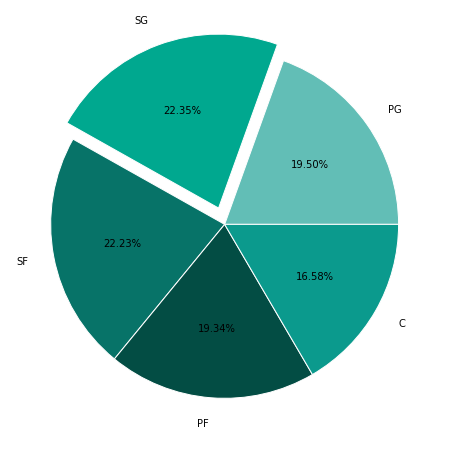

In [39]:
x_score = 'PG','SG','SF','PF','C'
y_count = [473.83,542.92,540.03,469.93,402.79]
explode = [0,0.1,0,0,0]
colors= ["#62BEB6","#00A88F","#077368","#034D44","#0B9A8D"]

##add colors

plt.pie(
    y_count,
    labels=x_score,
    labeldistance=1.15, 
    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },autopct='%1.2f%%', explode=explode,colors=colors)


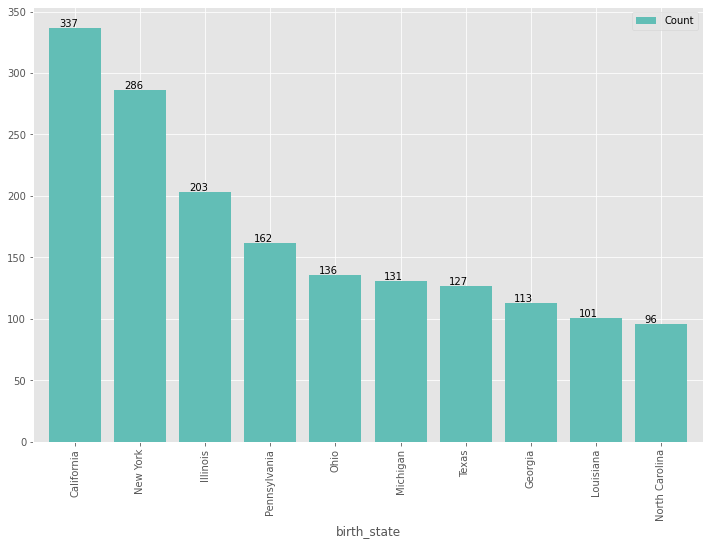

In [40]:






## have to make 5 seperate graphs per position 
city=players.groupby(['birth_state'])['born'].count().reset_index().sort_values(by='born',ascending=False)[:10]
city.set_index('birth_state',inplace=True)
city.columns=['Count']
ax=city.plot.bar(width=0.8,color='#62BEB6')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [41]:
Bron = season_stats.loc[season_stats['Player'] == 'LeBron James']

Bron

## First MVP year 2008-09

,int64_field_0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FTA,FT_,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS
10241,16746,2004,LeBron James,SG,19,CLE,79,79,3122,18.3,...,460,0.754,99,333,432,465,130,58,273,1654
10709,17344,2005,LeBron James,SF,20,CLE,80,80,3388,25.7,...,636,0.750,111,477,588,577,177,52,262,2175
11237,17918,2006,LeBron James,SF,21,CLE,79,79,3361,28.1,...,814,0.738,75,481,556,521,123,66,260,2478
11983,18460,2007,LeBron James,SF,22,CLE,78,78,3190,24.5,...,701,0.698,83,443,526,470,125,55,250,2132
12374,19017,2008,LeBron James,SF,23,CLE,75,74,3027,29.1,...,771,0.712,133,459,592,539,138,81,255,2250
12861,19611,2009,LeBron James,SF,24,CLE,81,81,3054,31.7,...,762,0.780,106,507,613,587,137,93,241,2304
13691,20207,2010,LeBron James,SF,25,CLE,76,76,2966,31.1,...,773,0.767,71,483,554,651,125,77,261,2258
14057,20812,2011,LeBron James,SF,26,MIA,79,79,3063,27.3,...,663,0.759,80,510,590,554,124,50,284,2111
14620,21395,2012,LeBron James,SF,27,MIA,62,62,2326,30.7,...,502,0.771,94,398,492,387,115,50,213,1683
15456,21933,2013,LeBron James,PF,28,MIA,76,76,2877,31.6,...,535,0.753,97,513,610,551,129,67,226,2036


In [42]:
MJ1 = season_stats.loc[season_stats['Player'] == 'Michael Jordan*']
MJ1

## First MVP year 1978-88

,int64_field_0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FTA,FT_,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS
1195,7716,1985,Michael Jordan*,SG,21,CHI,82,82,3144,25.8,...,746,0.845,167,367,534,481,196,69,291,2313
1502,8094,1986,Michael Jordan*,SG,22,CHI,18,7,451,27.5,...,125,0.840,23,41,64,53,37,21,45,408
1873,8469,1987,Michael Jordan*,SG,23,CHI,82,82,3281,29.8,...,972,0.857,166,264,430,377,236,125,272,3041
2303,8869,1988,Michael Jordan*,SG,24,CHI,82,82,3311,31.7,...,860,0.841,139,310,449,485,259,131,252,2868
2800,9297,1989,Michael Jordan*,SG,25,CHI,81,81,3255,31.1,...,793,0.850,149,503,652,650,234,65,290,2633
3148,9747,1990,Michael Jordan*,SG,26,CHI,82,82,3197,31.2,...,699,0.848,143,422,565,519,227,54,247,2753
3670,10212,1991,Michael Jordan*,SG,27,CHI,82,82,3034,31.6,...,671,0.851,118,374,492,453,223,83,202,2580
4091,10666,1992,Michael Jordan*,SG,28,CHI,80,80,3102,27.7,...,590,0.832,91,420,511,489,182,75,200,2404
4614,11106,1993,Michael Jordan*,SG,29,CHI,78,78,3067,29.7,...,569,0.837,135,387,522,428,221,61,207,2541
5564,12048,1995,Michael Jordan*,SG,31,CHI,17,17,668,22.1,...,136,0.801,25,92,117,90,30,13,35,457


In [43]:
MJ2 = MJ1.drop(1502)
MJ = MJ2.drop(5564)
MJ

,int64_field_0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FTA,FT_,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS
1195,7716,1985,Michael Jordan*,SG,21,CHI,82,82,3144,25.8,...,746,0.845,167,367,534,481,196,69,291,2313
1873,8469,1987,Michael Jordan*,SG,23,CHI,82,82,3281,29.8,...,972,0.857,166,264,430,377,236,125,272,3041
2303,8869,1988,Michael Jordan*,SG,24,CHI,82,82,3311,31.7,...,860,0.841,139,310,449,485,259,131,252,2868
2800,9297,1989,Michael Jordan*,SG,25,CHI,81,81,3255,31.1,...,793,0.850,149,503,652,650,234,65,290,2633
3148,9747,1990,Michael Jordan*,SG,26,CHI,82,82,3197,31.2,...,699,0.848,143,422,565,519,227,54,247,2753
3670,10212,1991,Michael Jordan*,SG,27,CHI,82,82,3034,31.6,...,671,0.851,118,374,492,453,223,83,202,2580
4091,10666,1992,Michael Jordan*,SG,28,CHI,80,80,3102,27.7,...,590,0.832,91,420,511,489,182,75,200,2404
4614,11106,1993,Michael Jordan*,SG,29,CHI,78,78,3067,29.7,...,569,0.837,135,387,522,428,221,61,207,2541
6086,12528,1996,Michael Jordan*,SG,32,CHI,82,82,3090,29.4,...,657,0.834,148,395,543,352,180,42,197,2491
6395,13096,1997,Michael Jordan*,SG,33,CHI,82,82,3106,27.8,...,576,0.833,113,369,482,352,140,44,166,2431


In [44]:
## Michael Jordan and Bron Offensive stats
mj_points = MJ['PTS']
mj_ast = MJ['AST']
mj_fgp = MJ['FG']/MJ['FGA'] * 100
mj_ftp = MJ['FT']/MJ['FTA'] * 100
mj_tov = MJ['TOV']



mjx = MJ['Year']

xftp = [10,20,30,40,50,60,65,70,75,80,85,90,95]

bron_points = Bron['PTS']
bron_ast = Bron['AST']
bron_fgp = Bron['FG']/Bron['FGA'] * 100
bron_ftp = Bron['FT']/Bron['FTA'] * 100
bron_tov = Bron['TOV']
brx = Bron['Year']

In [45]:
bron_fgp

In [46]:
from matplotlib.pyplot import figure

plt.rcParams['figure.figsize'] = [17,13]

Text(0.5, 1.0, "LeBron's Turnovers")

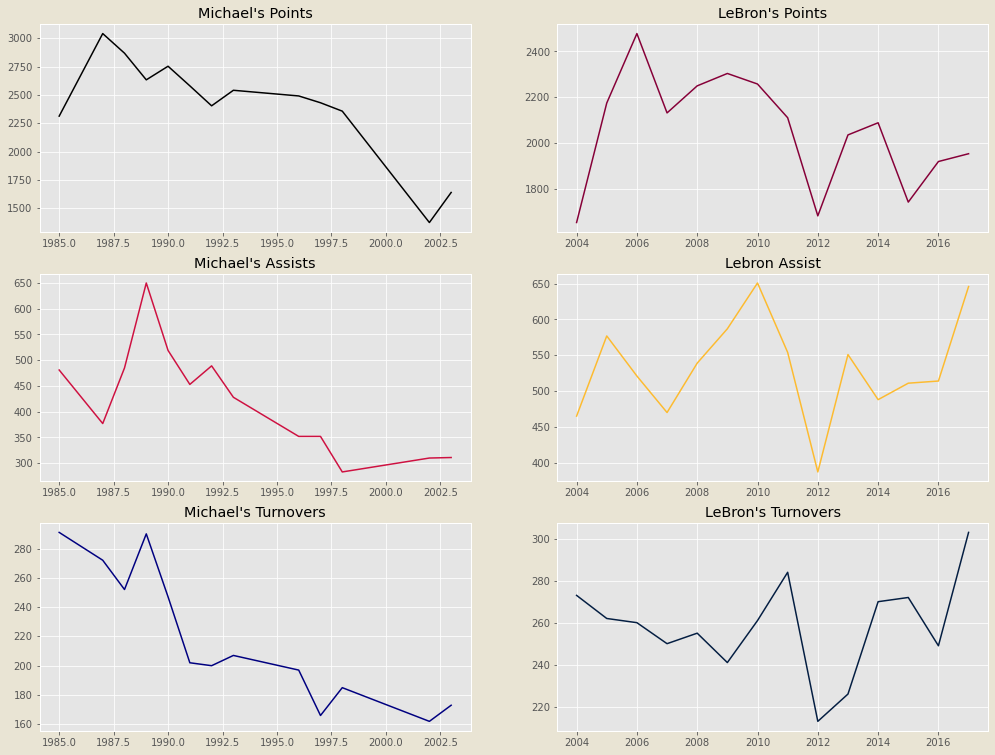

In [47]:

## MJ VS Bron Offensive stats
fig, ax = plt.subplots(3,2)
##fig.set_facecolor('purple')

fig.set_facecolor("#E9E4D4")


ax[0,0].plot(mjx,mj_points,c="#000000")
ax[0,0].set_title("Michael's Points")
##ax[0,0].set_facecolor

ax[0,1].plot(brx,bron_points,c="#860038")
ax[0,1].set_title("LeBron's Points")


ax[1,0].plot(mjx,mj_ast,c="#CE1141")
ax[1,0].set_title("Michael's Assists")

ax[1,1].plot(brx,bron_ast,c="#FDBB30")
ax[1,1].set_title('Lebron Assist')

ax[2,0].plot(mjx,mj_tov,c="#000080")
ax[2,0].set_title("Michael's Turnovers")

ax[2,1].plot(brx,bron_tov,c="#041E42")
ax[2,1].set_title("LeBron's Turnovers")
##plt.stackplot(x,mj_points,bron_points, labels=['Michael Jordan','LeBron James'])

1. How has the average height of NBA players changed through out each decade per position?
   
   **As indicated by the visualization above, the heights of NBA players have steadily increased every year.** 


2. How has the average weight changed of NBA players throughout the decades?

    **Average weight has gone up for NBA players by each decade. we can see it increased through every decade but the reason there 
    was a decline in the 2010s was because there was complete data to calculate the whole weight gain from 2010-2020 in this dataset.** 

3. Which University has the most players in the NBA?
   
   **The university with the most NBA players is University of California, Los Angeles (UCLA).**


4. How has the average age of NBA players changed over the years?

    **Age of NBA players has stayed relatively the same. We can see in the distribution that there majority of players who are in their 20s that are in the league and the a steady decline with players in their 30s.**

5. Which position has the most points in this data set?
    
    **Shooting guards on average have the most points in this dataset.**


6. Which state has the most NBA players?

    **Califorinia has the most NBA players followed by New York and Illinois.**

7. What were Lebron's stats like in 2012? 

    **Lebron's stats in 2012 were down compared to his previous years because he had to reduce his points and assist playing with dwayne wade and Chris Bosh. We can see by the charts that his averages started going back up after he left Miami and went back to Cleveland because his role was increased again.**

8. MJ Vs Bron career stat comparison